# Classify consumer complaints into the product category it belongs to using the description of the complaint.

"""
The goal of the project is to classify the complaint into a specific product
category. Since it has multiple categories, it becomes a multiclass
classification that can be solved through many of the machine learning
algorithms.
Once the algorithm is in place, whenever there is a new complaint,
we can easily categorize it and can then be redirected to the concerned
person. This will save a lot of time because we are minimizing the human
intervention to decide whom this complaint should go to.
"""

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [2]:
Data = pd.read_csv("C:\\Users\\baban\\Python Code\\Python\\MINI PROJECT\\NLP\\complaints.csv",encoding='latin-1',error_bad_lines=False)

In [3]:
Data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
# Selecting required columns and rows
Data = Data[['Product', 'Consumer complaint narrative']]
Data = Data[pd.notnull(Data['Consumer complaint narrative'])]

In [5]:
# Factorizing the category column
Data['category_id'] = Data['Product'].factorize()[0]
Data.head()

,Product,Consumer complaint narrative,category_id
0,Debt collection,transworld systems inc. \nis trying to collect...,0
2,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...,1
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
5,Debt collection,This complain it against Fifth Third Bank. ( f...,0
9,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh...",2


In [6]:
# Check the distriution of complaints by category
Data.groupby('Product')['Consumer complaint narrative'].count()

Product
Bank account or service                                                          14885
Checking or savings account                                                      22273
Consumer Loan                                                                     9473
Credit card                                                                      18838
Credit card or prepaid card                                                      38182
Credit reporting                                                                 31588
Credit reporting, credit repair services, or other personal consumer reports    179406
Debt collection                                                                 116206
Money transfer, virtual currency, or money service                                9087
Money transfers                                                                   1497
Mortgage                                                                         66005
Other financial service            

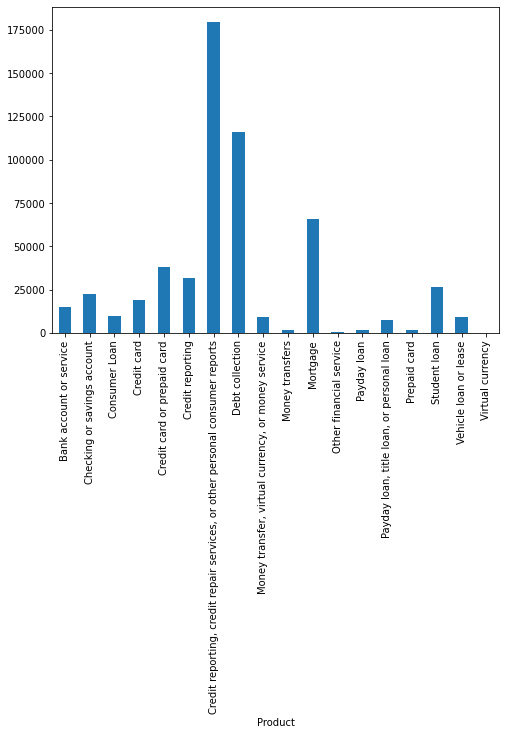

In [7]:
fig = plt.figure(figsize=(8,6))
Data.groupby('Product')['Consumer complaint narrative'].count().plot.bar(ylim=0)
plt.show()

In [8]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['Consumer complaint narrative'], Data['Product'])

In [9]:
# we consider maximum features to be 5000.
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Data['Consumer complaint narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [10]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

C:\Users\baban\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.7565727733421884


In [12]:
# Classification report
print(metrics.classification_report(valid_y, model.
predict(xvalid_tfidf),target_names=Data['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.61      0.51      0.56      3707
Credit reporting, credit repair services, or other personal consumer reports       0.67      0.72      0.69      5660
                          Money transfer, virtual currency, or money service       0.53      0.31      0.39      2457
                                                                    Mortgage       0.59      0.44      0.50      4681
                                                                Student loan       0.66      0.71      0.68      9706
                                                 Credit card or prepaid card       0.63      0.31      0.42      7855
                                                       Vehicle loan or lease       0.76      0.86      0.81     44548
                                                 Checki

C:\Users\baban\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))
# Vizualizing confusion matrix
category_id_df = Data[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','Product']].values)

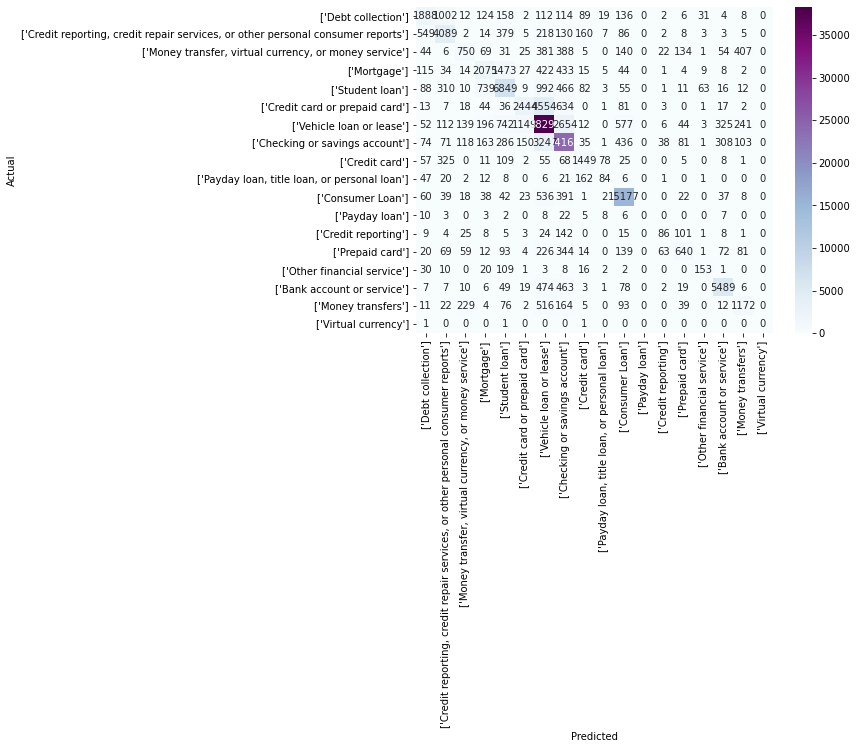

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",
 xticklabels=category_id_df[['Product']].values,
yticklabels=category_id_df[['Product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Checking or savings account'


'Ok lar... Joking wif u oni...'

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"
